In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import os

C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\akshu\AppData\Local\Conti

In [2]:
def generate_mock_data(num_samples=30, img_size=(50, 50), classes=['apple', 'banana', 'pizza']):
    X = []
    y = []
    for i, label in enumerate(classes):
        for _ in range(num_samples):
            # Generate random RGB image
            img = np.random.rand(*img_size, 3)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), classes

X, y, class_names = generate_mock_data()

In [3]:
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Train on 72 samples, validate on 18 samples
Epoch 1/5
72/72 [==============================] - 1s 15ms/sample - loss: 1.3528 - acc: 0.3333 - val_loss: 1.0593 - val_acc: 0.4444
Epoch 2/5
72/72 [==============================] - 0s 2ms/sample - loss: 1.1469 - acc: 0.3056 - val_loss: 1.0644 - val_acc: 0.4444
Epoch 3/5
72/72 [==============================] - 0s 2ms/sample - loss: 1.1315 - acc: 0.2917 - val_loss: 1.0846 - val_acc: 0.3333
Epoch 4/5
72/72 [==============================] - 0s 2ms/sample - loss: 1.0932 - acc: 0.3750 - val_loss: 1.1189 - val_acc: 0.2222
Epoch 5/5
72/72 [==============================] - 0s 2ms/sample - loss: 1.0809 - acc: 0.3611 - val_loss: 1.1421 - val_acc: 0.2222


In [6]:
calorie_dict = {
    'apple': 95,
    'banana': 105,
    'pizza': 285
}

In [7]:
import requests
from PIL import Image
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/9/91/Pizza-3007395.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img_resized = img.resize((50, 50))
img_array = np.array(img_resized) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [8]:
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
predicted_label = class_names[predicted_class]
calories = calorie_dict[predicted_label]

In [9]:
print(f"🍽️ Predicted Food: {predicted_label}")
print(f"🔥 Estimated Calories: {calories} kcal")

🍽️ Predicted Food: pizza
🔥 Estimated Calories: 285 kcal


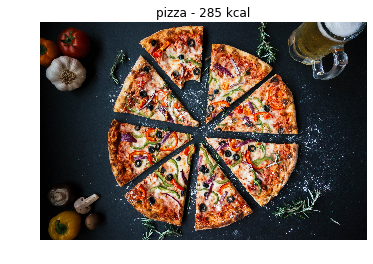

In [10]:
plt.imshow(img)
plt.title(f"{predicted_label} - {calories} kcal")
plt.axis('off')
plt.show()